In [165]:
# Imported various libraries such as numpy, pandas & seaborn required for data analysis, cleaning, visualization and analyzing the 
# behaviour of various independent variables and their corelation /impact over dependent variable.
# Task -- 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols      
from statsmodels.stats.proportion import proportions_ztest # for 4.C Test
from statsmodels.stats.anova import _get_covariance,anova_lm # For 4.D Test

In [166]:
# Reading the data file
# Task -- 2
mydataframe = pd.read_csv('insurance.csv')

In [6]:
mydataframe.shape # # Task -- 3.a, This dataset has 1338 rows and 7 columns. Shape of Data [] 

(1338, 7)

In [25]:
mydataframe.info () # Task -- 3.b, Shows datatypes of each column in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [26]:
mydataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
mydataframe.isnull().sum() # Task -- 3.c, There are not any NULL Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
mydataframe.describe() # Task -- 3.d, 5 Point summary of numerical attributes which includes min/max/1st quartile (25%)/median (50%)/3rd quartile (75%)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


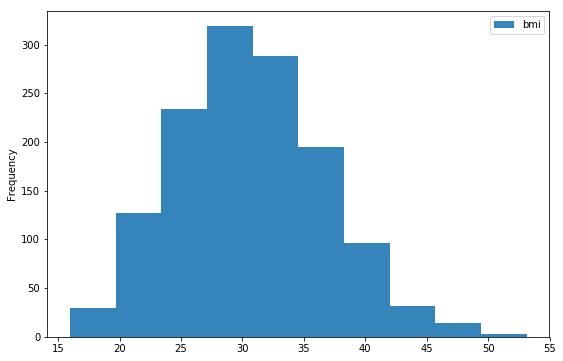

In [54]:
mydataframe.bmi.plot(kind='hist',figsize=[9,6],alpha=0.9,legend=True) # Task -- 3.d, Distribution of bmi

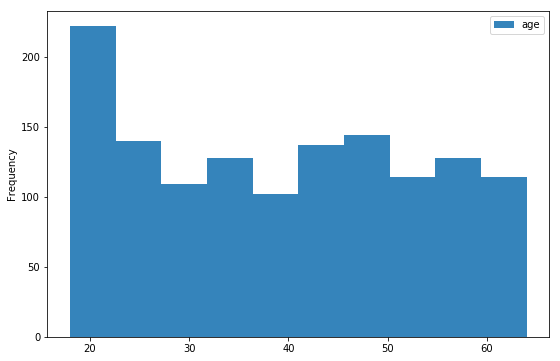

In [53]:
mydataframe.age.plot(kind='hist',figsize=[9,6],alpha=0.9,legend=True) # Task -- 3.d, Distribution of age

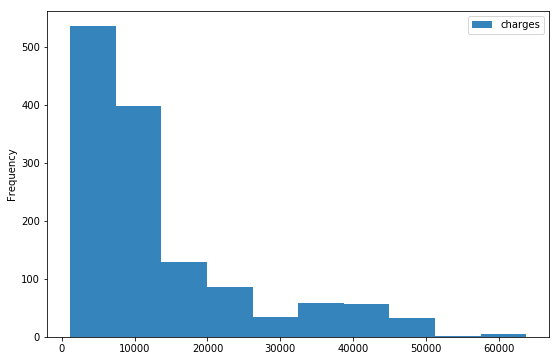

In [52]:
mydataframe.charges.plot(kind='hist',figsize=[9,6],alpha=0.9,legend=True) # Task -- 3.d, Distribution of charges

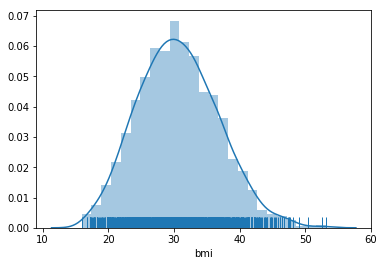

In [60]:
sns.distplot(mydataframe['bmi'], kde=True, rug=True); # Task -- 3.d, Distribution of bmi

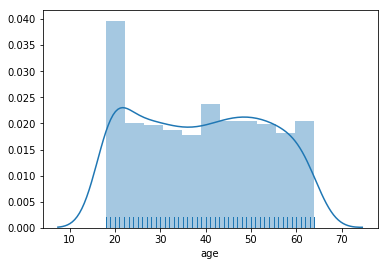

In [68]:
sns.distplot(mydataframe['age'], kde=True, rug=True); # Task -- 3.d, Distribution of age

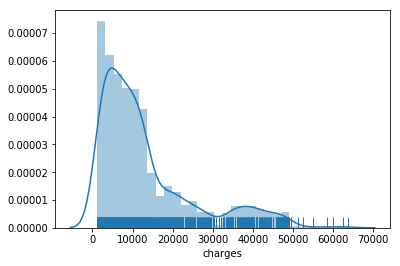

In [69]:
sns.distplot(mydataframe['charges'], kde=True, rug=True); # Task -- 3.d, Distribution of charges

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D798B4BA8>,
      dtype=object)

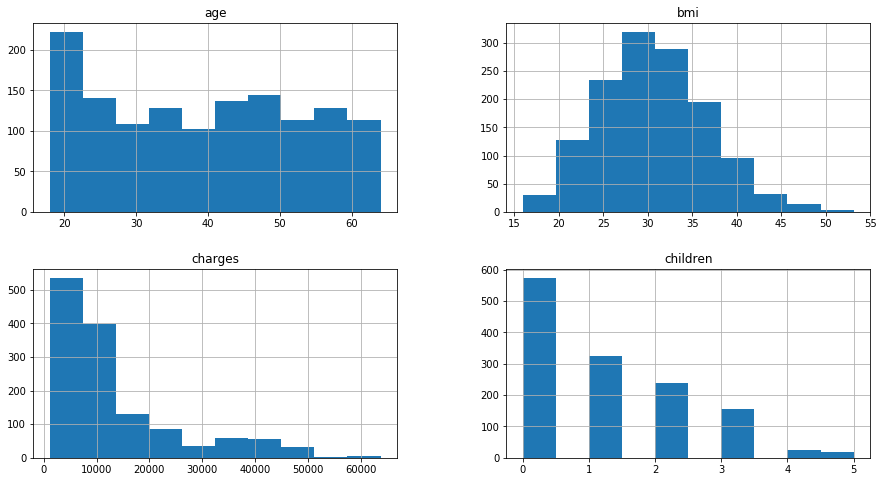

In [72]:
mydataframe.hist(figsize=(15,8)) # Task -- 3.d, Distribution of All Numerical columns

# 3.e Inference - BMI distriution is close to normal distribution. Age and Charges are not evenly spread and we can notice high probability in 1st quartile. Probability of Charges subsequently reduces whereas it more or less stays same for Age column

In [132]:
mydataframe.skew(axis=0,skipna=True ) # Task -- 3.f, Measure of skewness. Charges column is highly skewed in comparison to other columns
# There was no intention to include Children column but it got included because it is also numeric one like others

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

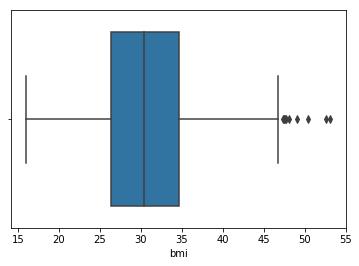

In [89]:
sns.boxplot(mydataframe['bmi'])  # Task -- 3.g, Around 6 outliers in BMI column

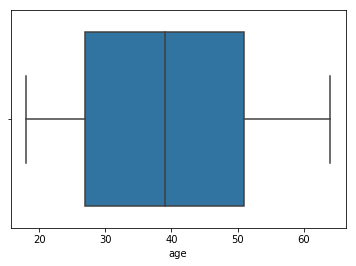

In [88]:
sns.boxplot(mydataframe['age'])  # Task -- 3.g, No Outlier in Age Column

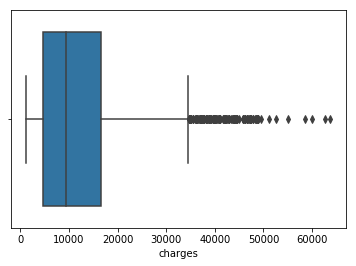

In [87]:
sns.boxplot(mydataframe['charges']) # Task -- 3.g, Plenty of outliers in charges column

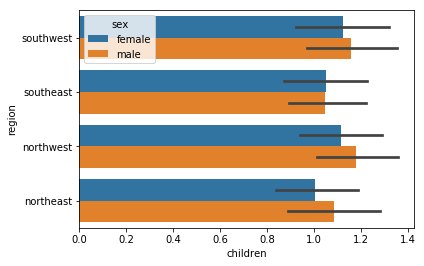

In [139]:
sns.barplot(mydataframe['children'], mydataframe['region'], hue=mydataframe['sex'])
# 3.h Distribution of categorical columns. Male Population seem to be higher across all regions except southeast.
#Secondly, Northwest region people seem to have more # of children than other regions.

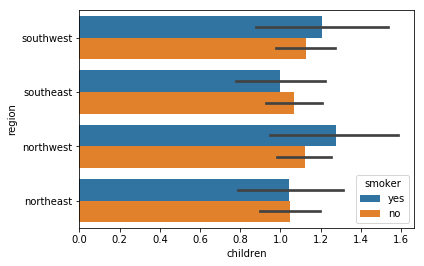

In [105]:
sns.barplot(mydataframe['children'], mydataframe['region'], hue=mydataframe['smoker'])
# 3.h Distribution of categorical columns. Smoking population seem to be higher in southwest and northwest regions.
#Secondly, Northwest region people seem to have more # of children than other regions.

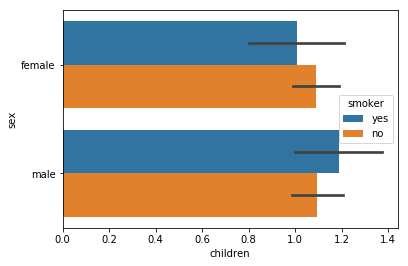

In [140]:
sns.barplot(mydataframe['children'], mydataframe['sex'], hue=mydataframe['smoker'])
# 3.h Distribution of categorical columns. Male Population seem to be smoking more than female one.

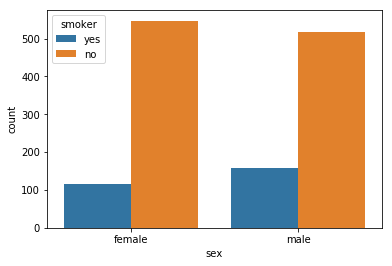

In [146]:
sns.countplot(x="sex", hue="smoker", data=mydataframe)
# 3.h Anaysis - Male population has higher # of smokers than females

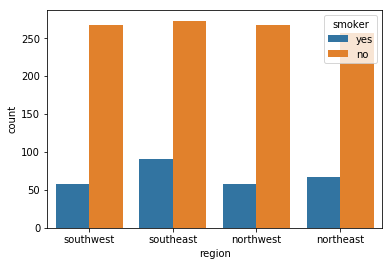

In [148]:
sns.countplot(x="region", hue="smoker", data=mydataframe) 
# 3.h Anaysis - Smokers population seem to be significantly less across all regions

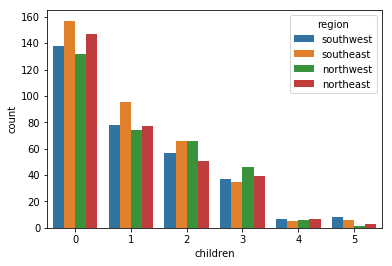

In [152]:
sns.countplot(x="children", hue="region", data=mydataframe) 
# 3.h Anaysis - Population of people having no children seem to be significantly high across all regions

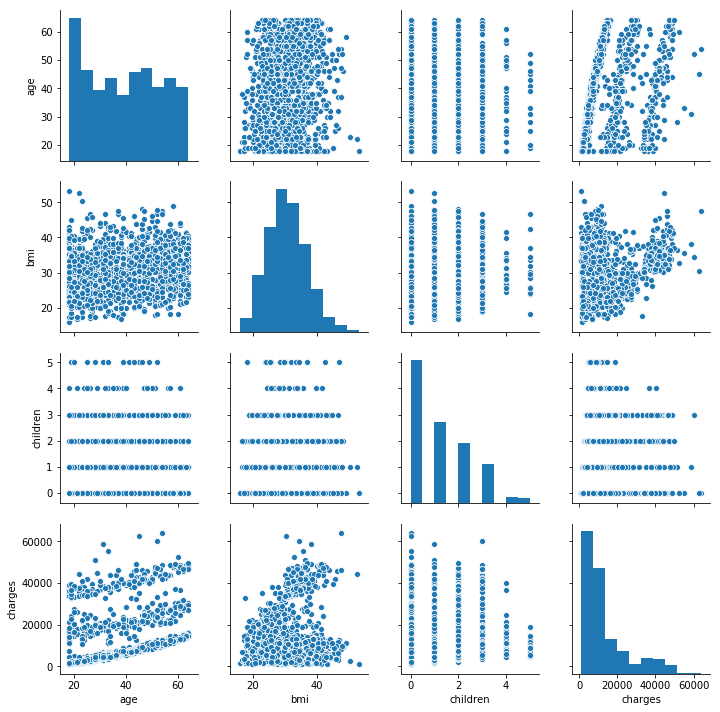

In [153]:
sns.pairplot(mydataframe[['age', 'sex', 'bmi','children','smoker','region','charges']]) 
# 3.i Pair Plot showing distribution of all columns

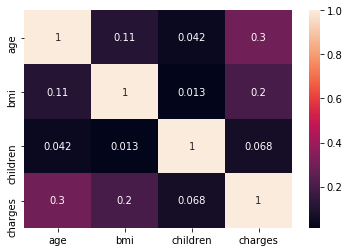

In [158]:
sns.heatmap(mydataframe.corr(),annot=True)

In [159]:
# Inference - 3.i 
 # 1.BMI is the only column which shows close to normal distriution. 
 # 2.Charges also seem to increase with increase in BMI.
 # 3.BMI shows weak correlation with age.
 # 4. Charges seem to progressively increase with the increase in age.
# As per heatmap, Only charges-age show relatively better correlation except other columns

#  Q -4.a  - Hypothesis definition

# H0: The mean charges of people who smoke doesn't significantly differ than mean charges of people who doesn't smoke

# HA: The mean charges of people who smoke sigfinicantly differ than mean charges of people who doesn't smoke

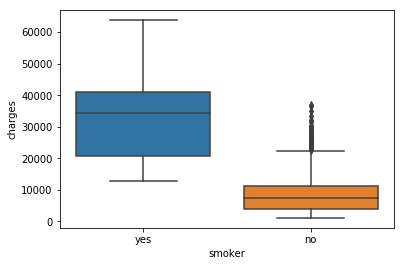

In [156]:
sns.boxplot(x="smoker", y="charges", data=mydataframe) 
# 4.a Boxplot clearly shows that Smokers have higher propertion of charges than non-smokers. However, Hypothesis below explains mathematically

In [53]:
SmokerDF = mydataframe[mydataframe['smoker']=='yes'].charges
NonSmokerDF = mydataframe[mydataframe['smoker']=='no'].charges
t_critical = 1.677
SmokerDF_mean = np.mean(SmokerDF)
NonSmokerDF_mean = np.mean(NonSmokerDF)
# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(NonSmokerDF, SmokerDF, equal_var=False)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
print("mean charges of smoking people=",SmokerDF_mean, ", mean charges of Non smoking people=", NonSmokerDF_mean)

t =  -32.751887766341824 , p_twosided =  5.88946444671698e-103 , p_onesided = 2.94473222335849e-103
mean charges of smoking people= 32050.23183153285 , mean charges of Non smoking people= 8434.268297856199


# Inference - Since p_twosided  < 0.05 and t value is -ve which signifies that we have enough evidence to reject NULL hypothesis and accept alternate hypothesis. Therefore it can be concluded that charges of smoking people are significantly higher than non-smoking ones.

#  Q -4.b - Hypothesis definition
H0: The mean BMI of males doesn't differ significantly then that of females

HA: The mean BMI of males differ significantly then that of females

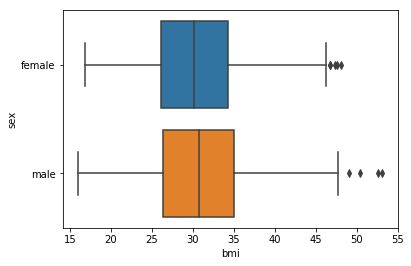

In [162]:
sns.boxplot(x="bmi", y="sex", data=mydataframe) 
# 4.b, BoxPlot clearly shows that mean BMI across genders doesn't differ much
# Hypothesis is explained below mathematically

In [60]:
maleBMI = mydataframe[mydataframe['sex']=='male'].bmi
femaleBMI = mydataframe[mydataframe['sex']=='female'].bmi
t_critical = 1.677
maleBMI_mean = np.mean(maleBMI)
femaleBMI_mean = np.mean(femaleBMI)
# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(femaleBMI, maleBMI, equal_var=False)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)
print("mean BMI of male=",maleBMI_mean, ", mean BMI of female=", femaleBMI_mean)

t =  -1.697027933124022 , p_twosided =  0.08992430667834876 , p_onesided = 0.04496215333917438
mean BMI of male= 30.943128698224832 , mean BMI of female= 30.377749244713023


# Inference - Since p_twosided  > 0.05 which signifies that we have enough evidence and hence fail to reject NULL hypothesis and reject alternate hypothesis. Therefore it can be concluded that BMI of male doesn't differ significantly then that of females.

#  Q -4.c  - Hypothesis definition

# H0: The proportion of smokers doesn't significantly differ across genders
# HA: The proportion of smokers does significantly differ across genders

In [116]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
malePopulation = mydataframe[mydataframe['sex']=='male']
femalePopulation = mydataframe[mydataframe['sex']=='female']

maleSmokerPopulation =malePopulation[malePopulation['smoker']=='yes']
femaleSmokerPopulation =femalePopulation[femalePopulation['smoker']=='yes']

malePopulationCount =malePopulation['sex'].value_counts()
femalePopulationCount =femalePopulation['sex'].value_counts()

maleSmokerCount =maleSmokerPopulation['smoker'].value_counts()
femaleSmokerCount =femaleSmokerPopulation['smoker'].value_counts()

count = np.array([maleSmokerCount,femaleSmokerCount])
nobs = np.array([malePopulationCount, femalePopulationCount])
z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

print("Male Population Count =",malePopulationCount, ", female Population Count=", femalePopulationCount)
print("Male Smoker Count=",maleSmokerCount, ", female Smoker Count=", femaleSmokerCount)

 z-stat = [2.78674022] 
 p-value = [0.00532411]
Male Population Count = male    676
Name: sex, dtype: int64 , female Population Count= female    662
Name: sex, dtype: int64
Male Smoker Count= yes    159
Name: smoker, dtype: int64 , female Smoker Count= yes    115
Name: smoker, dtype: int64


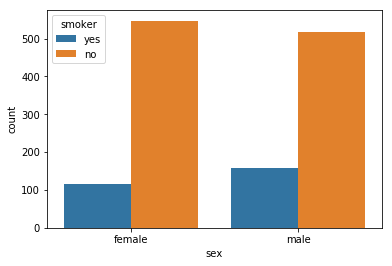

In [163]:
sns.countplot(x="sex", hue="smoker", data=mydataframe) 
# 4.C Countplot graph also shows that Smokers population is higher in males than in females
# Hypothesis explanation is given above mathematically

# Inference - Since p_value < 0.05 AND z score > 1.96 (z critical) which signifies that we have enough evidence to reject NULL hypothesis and accept alternate hypothesis. Therefore it can be concluded that proportions of smokers does differ across males and females. Additionally, we can see that Male smokers are proportionally higher than females.


#  Q -4.d  - Hypothesis definition

# H0: The distribution of BMI across women with no children/1 child/2 children is same
# HA: The distribution of BMI across women with no children/1 child/2 children is not same

In [117]:
femalePopulation = mydataframe[mydataframe['sex']=='female']
BMIWomen = femalePopulation[femalePopulation['children']<3]

In [123]:
AnovaDataSet = 'bmi ~ C(children)'
AnovaModel = ols (AnovaDataSet, BMIWomen).fit()
anova_TableSet = anova_lm (AnovaModel)
print (anova_TableSet)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


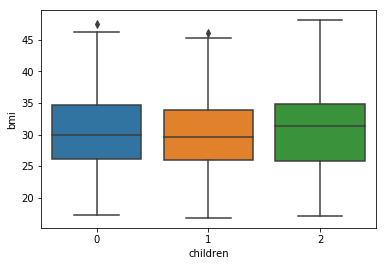

In [164]:
sns.boxplot(x="children", y="bmi", data=BMIWomen) # 4.D, It clearly shows that means in all 3 cases is same

# Inference - Since p_value > 0.71 AND F Value (0.33) is not high and isn't close to 1 which signifies that we have enough evidence which fail to reject NULL hypothesis and reject alternate hypothesis. Additionally, we can see that means across all 3 cases is more or less.Therefore it can be concluded that proportions of BMI across females with no children/1 child and 2 children is same.
